In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('E:\lec data science\machine learning\Titanic.xlsx')

In [3]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [5]:
df.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [6]:
df.shape

(891, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [8]:
df.describe()

,Pclass,Age,Survived
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,0.383838
std,0.836071,14.526497,0.486592
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,0.000000
50%,3.000000,28.000000,0.000000
75%,3.000000,38.000000,1.000000
max,3.000000,80.000000,1.000000


In [9]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

In [10]:
df.dropna(subset=["Embarked"],inplace=True)

In [11]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      0
Survived      0
dtype: int64

In [12]:
x=df['Age'].mean()

In [13]:
x

29.64209269662921

In [14]:
round(x)

30

In [15]:
df['Age']=df['Age'].fillna(round(x))

In [16]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [17]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

In [18]:
df

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0
...,...,...,...,...,...
886,2,male,27.0,S,0
887,1,female,19.0,S,1
888,3,female,30.0,S,0
889,1,male,26.0,C,1


In [19]:
final=pd.get_dummies(data=df,columns=['Sex','Embarked'],drop_first=True)

In [20]:
final

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,1
1,1,38.0,1,0,0,0
2,3,26.0,1,0,0,1
3,1,35.0,1,0,0,1
4,3,35.0,0,1,0,1
...,...,...,...,...,...,...
886,2,27.0,0,1,0,1
887,1,19.0,1,0,0,1
888,3,30.0,0,0,0,1
889,1,26.0,1,1,0,0


In [21]:
X=final.drop('Survived',axis=1)

In [22]:
X

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1
1,1,38.0,0,0,0
2,3,26.0,0,0,1
3,1,35.0,0,0,1
4,3,35.0,1,0,1
...,...,...,...,...,...
886,2,27.0,1,0,1
887,1,19.0,0,0,1
888,3,30.0,0,0,1
889,1,26.0,1,0,0


In [23]:
y=df.Survived

In [24]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
X_train.shape

(711, 5)

In [28]:
y_train.shape

(711,)

In [29]:
X_test.shape

(178, 5)

In [30]:
y_test.shape

(178,)

In [31]:
from sklearn.naive_bayes import BernoulliNB

In [32]:
model=BernoulliNB()

In [33]:
model.fit(X_train,y_train)

BernoulliNB()

In [34]:
model.score(X_test,y_test)

0.797752808988764

In [35]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

In [36]:
y_pred=model.predict(X_test)

In [37]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [38]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [39]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7808988764044944

In [40]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7078651685393258

In [41]:
import matplotlib.pyplot as plt

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm=confusion_matrix(y_test,y_pred)

In [44]:
import seaborn as sns

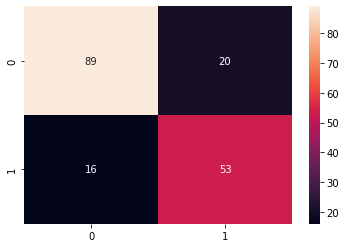

In [45]:
sns.heatmap(cm,annot=True)
plt.show()